# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

---
# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
from platform import version

%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


---
# Version Control

In [2]:
print(f'Python Version: {version()}')
print(f'Pandas Version: {pd.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')
print(f'Seaborn Version: {sns.__version__}')

Python Version: 10.0.19044
Pandas Version: 1.3.4
Matplotlib Version: 3.4.3
Seaborn Version: 0.11.2


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [3]:
pd.DataFrame([df.isna().sum(), df.isna().sum()/df.shape[0]*100]).T.rename(columns = {0 : 'Total Missing Values', 1 : 'Missing Value Percentage'})

,Total Missing Values,Missing Value Percentage
year,0.0,0.000000
make,10301.0,1.843292
model,10399.0,1.860829
trim,10651.0,1.905922
body,13195.0,2.361154
transmission,65353.0,11.694465
vin,4.0,0.000716
state,0.0,0.000000
condition,11794.0,2.110454
odometer,94.0,0.016821


**As we can see 9 columns have missing values in them**

---
## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


In [5]:
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


>year: Should be a datetime

>condition, mmr: `condition` and `mmr` contains numeric values. For some instances in the dataset, rows got shifted to 1 column right. So first, for such rows we will clean the data and then change the datatype.

> saledate : Saledate should be datetime

<font color='Red'> <h1>Warning: The line below will throw an error</h1> </font>
> Because some of instances in mmr column has non-numeric values

In [7]:
df['mmr'] = df['mmr'].astype('int')

ValueError: invalid literal for int() with base 10: 'vw credit prequalified'

> mmr contains some string values which belongs to the column privous to it. We will further analyse it.

In [8]:
df[ df['mmr'] == 'vw credit prequalified']

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,oh,4.6,4802,silver,gray,vw credit prequalified,13200,16500
529013,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,sedan,automatic,3vwd17aj4fm236636,ca,5.0,5705,—,black,vw credit prequalified,13400,15250


**Here we can see that values has been shifted to one columns to right. Now we will find all the instance where the value are misplaced and fix them**

In [9]:
l = [] # list for storing index of rows which has wrong values
count = 0 # Indexer

def get_index(x):
    '''
    This function finds the index of the row where 'mmr' value is non-numeric. 
    
    ------------
    Parameters:
    x : mmr value
    '''
    global l, count
    
    # Using exception handling to get the index of all rows which has misplaced values. 
    try:
        int(x)
    except:
        l.append(count)
    count+=1


_ = df['mmr'].apply(lambda x: get_index(x))

In [10]:
# These are all the instance where row got shifted to 1 column right starting from body. 
df.iloc[l]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,oh,4.6,4802,silver,gray,vw credit prequalified,13200,16500
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,ms,1.0,9410,white,gray,enterprise vehicle exchange / tra / birmingham,13300,10500
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,co,4.6,1167,blue,black,tdaf remarketing,13200,12700
424161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm285365,ms,1.0,2172,gray,black,enterprise vehicle exchange / tra / birmingham,14050,8250
427040,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj0fm227318,fl,4.1,14872,gray,black,enterprise veh exchange/rental,13700,14300
427043,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj6fm218641,fl,4.9,12655,red,black,enterprise veh exchange/rental,13850,14500
434424,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj7fm223475,fl,4.6,15719,blue,black,sixt rent a car llc,13650,13500
444501,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm297123,sc,2.0,6388,white,black,enterprise vehicle exchange / tra / rental / t...,13850,10700
453794,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm219943,fl,4.4,16633,silver,black,sixt rent a car llc,13600,13600
461597,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj9fm219766,ca,4.4,11034,black,black,premium auto wholesale,13900,13000


In [11]:
# Fixing all the instances
columns_to_fill_in = ['body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice']

columns_to_fill_from = ['transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate']

for c1, c2 in zip(columns_to_fill_in, columns_to_fill_from):
    df.loc[l, c1] = df.loc[l][c2] # Shifting values to the original column

df.loc[l, 'saledate'] = None # The last column had no values to fill from, so we will put None

In [12]:
# Here you can see all the values correctly filled
df.loc[l][columns_to_fill_from]

,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,automatic,3vwd17aj4fm201708,oh,4.6,4802,silver,gray,vw credit prequalified,13200,16500,None
417835,automatic,3vwd17aj2fm258506,ms,1.0,9410,white,gray,enterprise vehicle exchange / tra / birmingham,13300,10500,None
421289,automatic,3vwd17aj3fm276741,co,4.6,1167,blue,black,tdaf remarketing,13200,12700,None
424161,automatic,3vwd17aj2fm285365,ms,1.0,2172,gray,black,enterprise vehicle exchange / tra / birmingham,14050,8250,None
427040,automatic,3vwd17aj0fm227318,fl,4.1,14872,gray,black,enterprise veh exchange/rental,13700,14300,None
427043,automatic,3vwd17aj6fm218641,fl,4.9,12655,red,black,enterprise veh exchange/rental,13850,14500,None
434424,automatic,3vwd17aj7fm223475,fl,4.6,15719,blue,black,sixt rent a car llc,13650,13500,None
444501,automatic,3vwd17aj5fm297123,sc,2.0,6388,white,black,enterprise vehicle exchange / tra / rental / t...,13850,10700,None
453794,automatic,3vwd17aj5fm219943,fl,4.4,16633,silver,black,sixt rent a car llc,13600,13600,None
461597,automatic,3vwd17aj9fm219766,ca,4.4,11034,black,black,premium auto wholesale,13900,13000,None


**Finally converting the datatype of columns**

In [13]:
df['year'] = pd.to_datetime(df['year'], format = '%Y').dt.year
df['mmr'] = df['mmr'].astype('int')
df['condition'] = df['condition'].astype('float')
df['sellingprice'] = df['sellingprice'].astype('int')


### Date Formatting

    %Y - Year with century as a decimal number.
    %m - Month as a decimal number [01,12].
    %d - Day of the month as a decimal number [01,31].
    %H - Hour (24-hour clock) as a decimal number [00,23].
    %M - Minute as a decimal number [00,59].
    %S - Second as a decimal number [00,61].
    %z - Time zone offset from UTC.
    %a - Locale's abbreviated weekday name.
    %A - Locale's full weekday name.
    %b - Locale's abbreviated month name.
    %B - Locale's full month name.
    %c - Locale's appropriate date and time representation.
    %I - Hour (12-hour clock) as a decimal number [01,12].
    %p - Locale's equivalent of either AM or PM.

In [14]:
# Converting Saledate to datetime

## Here, I was unable to convert the `GMT-0800 (PST)` part to datetime, so I have only took the part before this and converted it to datetime
df['saledate'] = df['saledate'].apply(lambda x: x.split('G')[0].strip() if x != None else x)
df['saledate'] = pd.to_datetime(df['saledate'], format="%a %b %d %Y %H:%M:%S")

---
## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [15]:
df['make'].nunique()
# In the dataset, there are 96 unique make values. 

96

In [16]:
makes = df['make'].unique().tolist()
makes = [str(s).lower() for s in makes]
print(sorted(makes))

['acura', 'acura', 'airstream', 'aston martin', 'audi', 'audi', 'bentley', 'bmw', 'bmw', 'buick', 'buick', 'cadillac', 'cadillac', 'chev truck', 'chevrolet', 'chevrolet', 'chrysler', 'chrysler', 'daewoo', 'dodge', 'dodge', 'dodge tk', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'ford', 'ford tk', 'ford truck', 'geo', 'gmc', 'gmc', 'gmc truck', 'honda', 'honda', 'hummer', 'hyundai', 'hyundai', 'hyundai tk', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'jeep', 'kia', 'kia', 'lamborghini', 'land rover', 'land rover', 'landrover', 'lexus', 'lexus', 'lincoln', 'lincoln', 'lotus', 'maserati', 'maserati', 'mazda', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercedes-benz', 'mercury', 'mercury', 'mini', 'mitsubishi', 'mitsubishi', 'nan', 'nissan', 'nissan', 'oldsmobile', 'oldsmobile', 'plymouth', 'plymouth', 'pontiac', 'pontiac', 'porsche', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'subaru', 'suzuki', 'suzuki', 'tesla', 'toyota', 'toyota', 'volkswagen', 'volk

> As we can see above, after convering all makes to lowercase, there are multiple instances for same value.

> So now, in the main dataset, we will convert all the makes to lowercase which will reduce the number of unique elements in th column.


In [17]:
# Using lambda function to convert make column to lowecase
df.loc[ ~df['make'].isna(), 'make'] = df[ ~df['make'].isna()]['make'].apply(lambda x: str(x).lower())

In [18]:
df['make'].nunique()

66

**We have reduced the number of unique values from 96 to 66.**

---
## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

**What is the overall correlation?**

> The overall correlation is 0.983632.

In [19]:
df[['mmr', 'sellingprice']].corr()

,mmr,sellingprice
mmr,1.000000,0.983632
sellingprice,0.983632,1.000000


**What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?**

In [20]:
df[ df['sellingprice'] < 10000].corr()['mmr']['sellingprice']

0.8710142537645569

In [21]:
mmr_sell_corr_df = pd.DataFrame(columns=['window', 'correlation'])

index = 0
for i in range(10000, df['sellingprice'].max()+1, 10000):
    mmr_sell_corr_df.loc[index] = [i, df[ df['sellingprice'] < i+1].corr()['mmr']['sellingprice']] # 
    index+=1

In [22]:
mmr_sell_corr_df

,window,correlation
0,10000.0,0.874344
1,20000.0,0.958438
2,30000.0,0.974417
3,40000.0,0.979166
4,50000.0,0.981269
5,60000.0,0.982238
6,70000.0,0.982707
7,80000.0,0.983185
8,90000.0,0.983425
9,100000.0,0.983575


> **As we can see, as the window increase, coorelation is also increasing** 

**Create a scatter plot with the relationship.**

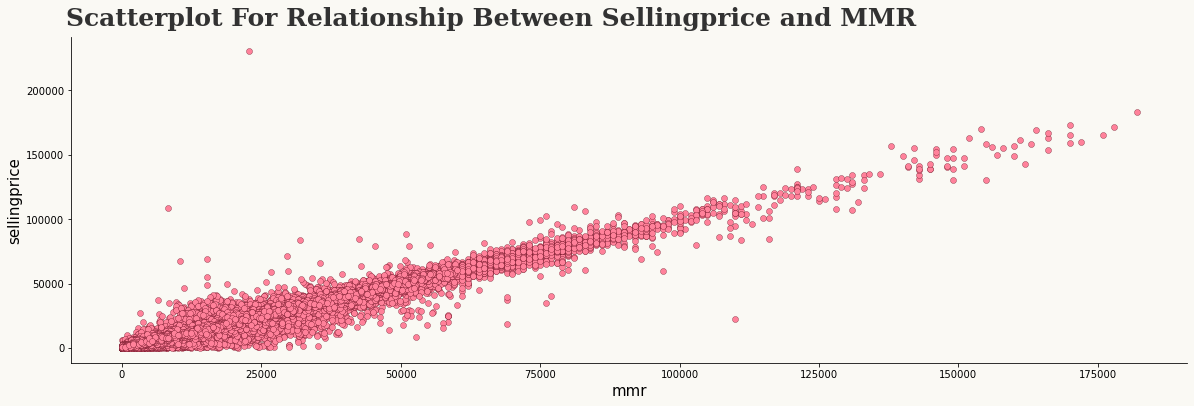

In [23]:
fig = plt.figure(figsize = (20, 6))
gs = fig.add_gridspec(1, 1)

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color) # axes background color

for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)

    
_ = sns.scatterplot(data = df, x='mmr', y='sellingprice', color='#ff819a', linewidth=0.3, edgecolor='#5a0012', zorder=3, ax = ax0)
_ = ax0.set_ylabel('sellingprice', fontsize=15)
_ = ax0.set_xlabel('mmr', fontsize=15)

_ = ax0.text(-10000, 250000, 'Scatterplot For Relationship Between Sellingprice and MMR', fontsize = 25, fontweight='bold', fontfamily='serif', color='#323232')

> As the mmr increases we can see that the data is more homoscedastic.

**Create a graph that shows how the correlation changes.**

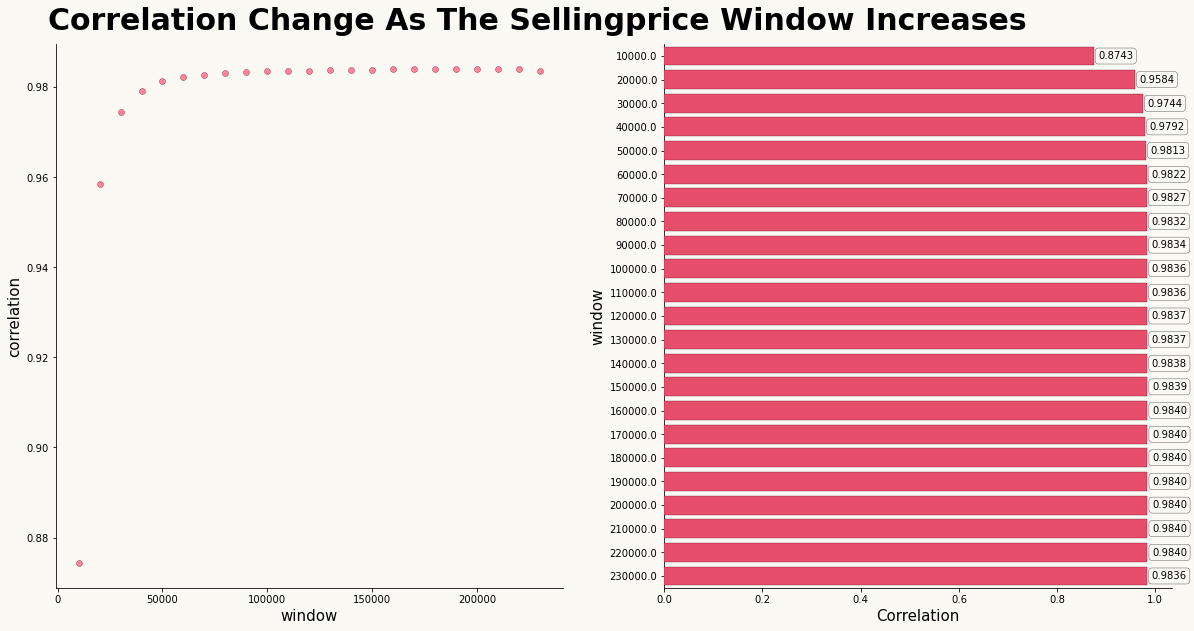

In [24]:
fig = plt.figure(figsize = (20, 10))
gs = fig.add_gridspec(1, 2)

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color) # axes background color

for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

_ = sns.scatterplot(data = mmr_sell_corr_df, x='window', y='correlation', color='#ff819a', linewidth=0.3, edgecolor='#5a0012', zorder=3, ax = ax0)
_ = ax0.set_ylabel('Correlation', fontsize=15)
_ = ax0.set_xlabel('Window', fontsize=15)

palette = ['#ff355d']*100
_ = sns.barplot(data = mmr_sell_corr_df, x='correlation', y='window', color='#ff819a', linewidth=0.3, edgecolor='#5a0012', zorder=3, ax = ax1, orient = 'h', palette=palette)
_ = ax0.set_ylabel('correlation', fontsize=15)
_ = ax0.set_xlabel('window', fontsize=15)

for p in ax1.patches:
    value = f'{p.get_width():.4f}'
    x = p.get_x() + p.get_width() + 0.045
    y = p.get_y() + p.get_height() - 0.4
    ax1.text(x, y, value, ha = 'center', va = 'center', fontsize = 10,
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

_ = ax1.set_ylabel('window', fontsize=15)
_ = ax1.set_xlabel('Correlation', fontsize=15)

_= fig.text(0.12, 0.9, 'Correlation Change As The Sellingprice Window Increases', fontsize=30, weight='bold')

> **From the plot we can see that as the window is increasing, the correlation is also increasing.**

----
## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [25]:
# Seperating the data as per year
year_data = df[ df['year'].between(2010, 2015)]

In [26]:
# Creating a list of top 10 makes
top_makes = year_data['make'].value_counts()[:10].index.tolist()

In [27]:
print(top_makes)

['ford', 'nissan', 'chevrolet', 'toyota', 'dodge', 'hyundai', 'honda', 'kia', 'infiniti', 'bmw']


In [28]:
# Selecting the data with top 10 makes using isin
data = df[ df['make'].isin(top_makes)]

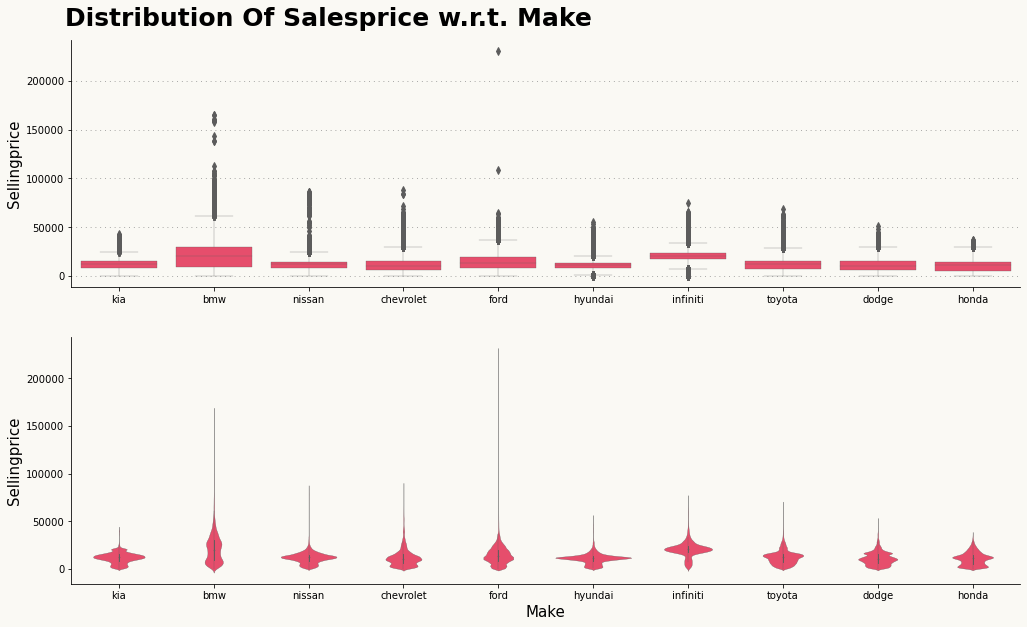

In [29]:
fig = plt.figure(figsize = (17, 10))
gs = fig.add_gridspec(2, 1)

background_color = "#faf9f4"
fig.patch.set_facecolor(background_color) # figure background color

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax0.set_facecolor(background_color) # axes background color
ax1.set_facecolor(background_color)

for s in ['right', 'top']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

palette = ['#ff355d']*100

ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
_ = sns.boxplot(data = data, x='make', y='sellingprice', color='#ff819a', linewidth=0.3, zorder=3, ax = ax0, palette=palette)
_ = ax0.set_ylabel('Sellingprice', fontsize=15)
_ = ax0.set_xlabel('')

_ = sns.violinplot(data = data, x='make', y='sellingprice', color='#ff819a', linewidth=0.3, zorder=3, ax = ax1, palette=palette)
_ = ax1.set_ylabel('Sellingprice', fontsize=15)
_ = ax1.set_xlabel('Make', fontsize=15)



_= fig.text(0.12, 0.9, 'Distribution Of Salesprice w.r.t. Make', fontsize=25, weight='bold')